In [2]:
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
import sys

#KYW inst
fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/KYW Inst.wav')
#ATF Drums
#fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/Around the fur drums.wav')

# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -0.9484677314758301
Max Value: 0.9998999834060669


In [54]:
#Variables
G = 20
fc = 1000
Q = 1

K = np.tan((np.pi * fc)/fs)
V0 = np.power(10,(G/20))
root2 = 1/Q

In [55]:
# Bass Cut

b0_b = (1 + root2*K + np.power(K,2)) / (1 + root2*np.sqrt(V0)*K + V0*np.power(K,2))
b1_b = (2 * (np.power(K,2) - 1) ) / (1 + root2*np.sqrt(V0)*K + V0*np.power(K,2))
b2_b = (1 - root2*K + np.power(K,2)) / (1 + root2*np.sqrt(V0)*K + V0*np.power(K,2))
a1_b = (2 * (V0*np.power(K,2) - 1) ) / (1 + root2*np.sqrt(V0)*K + V0*np.power(K,2))
a2_b = (1 - root2*np.sqrt(V0)*K + V0*np.power(K,2)) / (1 + root2*np.sqrt(V0)*K + V0*np.power(K,2))

a_locut = [1, a1_b, a2_b]
b_locut = [b0_b, b1_b, b2_b]

w_lo, H_lo = signal.freqz(a_locut, b_locut)

In [56]:
# high Cut

b0_h = (1 + root2*K + np.power(K,2)) / (V0 + root2*np.sqrt(V0)*K + np.power(K,2))
b1_h = (2 * (np.power(K,2) - 1) ) / (V0 + root2*np.sqrt(V0)*K + np.power(K,2))
b2_h = (1 - root2*K + np.power(K,2)) / (V0 + root2*np.sqrt(V0)*K + np.power(K,2))
a1_h = (2 * ((np.power(K,2)/V0) - 1) ) / (1 + root2/np.sqrt(V0)*K + np.power(K,2)/V0)
a2_h = (1 - root2/np.sqrt(V0)*K + np.power(K,2)/V0) / (1 + root2/np.sqrt(V0)*K + np.power(K,2)/V0)

a_hicut = [1, a1_h, a2_h]
b_hicut = [b0_h, b1_h, b2_h]

w_hi, H_hi = signal.freqz(a_hicut, b_hicut)

/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_24602/3954262292.py:15: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits
/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_24602/3954262292.py:29: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, fs/2])  # Set x-axis limits


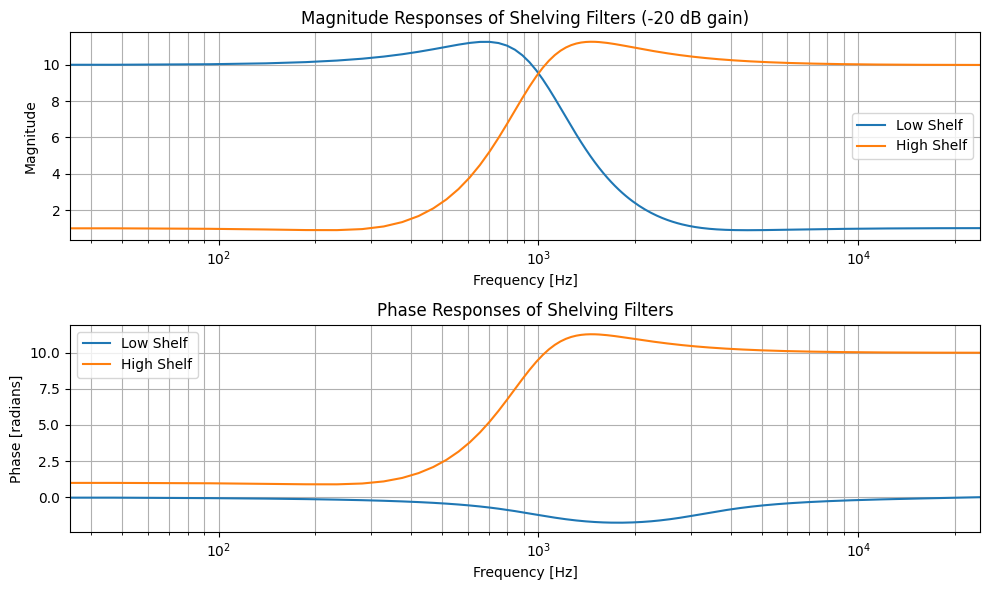

In [57]:
freq_hz_lo = w_lo * (fs / (2 * np.pi))

freq_hz_hi = w_hi * (fs / (2 * np.pi))

# Plot magnitude and phase responses in Hz
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_hz_lo, np.abs(H_lo), label='Low Shelf')
plt.plot(freq_hz_hi, np.abs(H_hi), label='High Shelf')
plt.title('Magnitude Responses of Shelving Filters (-20 dB gain)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
#plt.axvline(cornerFreq_lo, color='green')
#plt.axvline(cornerFreq_hi, color='red')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(freq_hz_lo, np.angle(H_lo), label='Low Shelf')
plt.plot(freq_hz_hi, np.abs(H_hi), label='High Shelf')
plt.title('Phase Responses of Shelving Filters')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid(which='both')
plt.xscale('log')  # Set x-axis to a logarithmic scale
plt.xlim([0, fs/2])  # Set x-axis limits
plt.legend()


plt.tight_layout()
plt.show()

In [60]:
### Filtering Data ###
b = b_locut
a = a_locut

stereoFiltered = signal.lfilter(b, a, data)


In [61]:
sd.play(stereoFiltered, fs)